# Домашнее задание HW05


## 1. Загрузка данных и первичный анализ

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [9]:
# Загрузка датасета
df = pd.read_csv('S05-hw-dataset.csv')

In [10]:
# Вывод первых строк датасета
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [11]:
# Информация о столбцах и типах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [12]:
# Базовые описательные статистики для числовых признаков
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [13]:
# Распределение целевого признака default
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

### Краткий анализ данных

На основе первичного анализа данных можно сделать следующие наблюдения:
- В датасете содержится 300 объектов и 17 признаков
- Целевой признак `default` показывает, что примерно 40.1% наблюдений являются дефолтами (класс 1)
- Наблюдается умеренный дисбаланс классов, что требует внимательного подхода к оценке качества модели
- Все признаки числовые (int64 или float64), что удобно для машинного обучения
- В датасете отсутствуют пропущенные значения

## 2. Подготовка признаков и таргета

In [ ]:
# Выделение матрицы признаков X и вектора таргета y
X = df.drop(['default', 'client_id'], axis=1)
y = df['default']

In [15]:
# Проверим размерности
print(f"Размерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

Размерность X: (3000, 15)
Размерность y: (3000,)


In [16]:
# Проверим, что все признаки числовые
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3000 non-null   int64  
 1   income                          3000 non-null   int64  
 2   years_employed                  3000 non-null   int64  
 3   credit_score                    3000 non-null   int64  
 4   debt_to_income                  3000 non-null   float64
 5   num_credit_cards                3000 non-null   int64  
 6   num_late_payments               3000 non-null   int64  
 7   has_mortgage                    3000 non-null   int64  
 8   has_car_loan                    3000 non-null   int64  
 9   savings_balance                 3000 non-null   int64  
 10  checking_balance                3000 non-null   int64  
 11  region_risk_score               3000 non-null   float64
 12  phone_calls_to_support_last_3m  30

In [17]:
# Проверим диапазоны некоторых признаков
print(f"Диапазон debt_to_income: [{X['debt_to_income'].min()}, {X['debt_to_income'].max()}]")
print(f"Количество уникальных значений num_late_payments: {X['num_late_payments'].nunique()}")

Диапазон debt_to_income: [0.0061471149847966, 0.878343349584274]
Количество уникальных значений num_late_payments: 15


## 3. Train/Test-сплит и бейзлайн-модель

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

In [19]:
# Создание бейзлайн-модели на основе DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'most_frequent'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [20]:
# Предсказания бейзлайн-модели на тестовой выборке
y_pred_dummy = dummy_clf.predict(X_test)

In [21]:
# Оценка бейзлайн-модели по метрикам
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, dummy_clf.predict_proba(X_test)[:, 1])

print(f"Accuracy бейзлайн-модели: {accuracy_dummy:.4f}")
print(f"ROC-AUC бейзлайн-модели: {roc_auc_dummy:.4f}")

Accuracy бейзлайн-модели: 0.5900
ROC-AUC бейзлайн-модели: 0.5000


## 4. Логистическая регрессия и подбор гиперпараметров

In [22]:
# Создание Pipeline с нормализацией и логистической регрессией
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

In [23]:
# Подбор параметра регуляризации C с помощью GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'logreg__C': [0.01, 0.1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidat

In [24]:
# Вывод лучших параметров
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая оценка кросс-валидации: {grid_search.best_score_:.4f}")

Лучшие параметры: {'logreg__C': 100.0}
Лучшая оценка кросс-валидации: 0.8607


In [25]:
# Использование лучшей модели для предсказаний
best_model = grid_search.best_estimator_
y_pred_lr = best_model.predict(X_test)
y_pred_proba_lr = best_model.predict_proba(X_test)[:, 1]

In [26]:
# Оценка логистической регрессии по различным метрикам
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Accuracy логистической регрессии: {accuracy_lr:.4f}")
print(f"ROC-AUC логистической регрессии: {roc_auc_lr:.4f}")
print(f"Precision логистической регрессии: {precision_lr:.4f}")
print(f"Recall логистической регрессии: {recall_lr:.4f}")
print(f"F1-мера логистической регрессии: {f1_lr:.4f}")

Accuracy логистической регрессии: 0.8017
ROC-AUC логистической регрессии: 0.8756
Precision логистической регрессии: 0.7953
Recall логистической регрессии: 0.6951
F1-мера логистической регрессии: 0.7419


## 5. Построение графиков

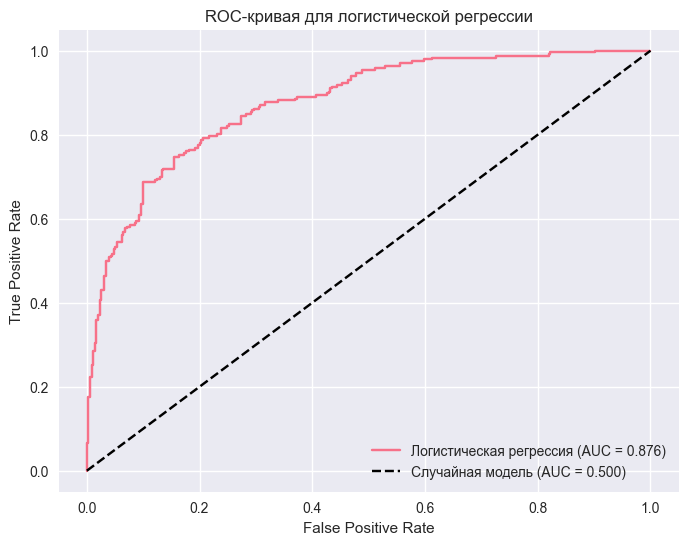

In [27]:
# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Логистическая регрессия (AUC = {roc_auc_lr:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend()
plt.grid(True)
plt.savefig('figures/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Сравнение бейзлайна и логистической регрессии

In [ ]:
# Создание таблицы для сравнения моделей
results_df = pd.DataFrame({
    'Модель': ['Бейзлайн (Dummy)', 'Логистическая регрессия'],
    'Accuracy': [accuracy_dummy, accuracy_lr],
    'ROC-AUC': [roc_auc_dummy, roc_auc_lr],
    'Precision': [np.nan, precision_lr],  
    'Recall': [np.nan, recall_lr],
    'F1-мера': [np.nan, f1_lr]
})

results_df

,Модель,Accuracy,ROC-AUC,Precision,Recall,F1-мера
0,Бейзлайн (Dummy),0.590000,0.500000,NaN,NaN,NaN
1,Логистическая регрессия,0.801667,0.875649,0.795349,0.695122,0.741866


## 7. Отчет по результатам эксперимента

Выводы:

1. Бейзлайн-модель, которая всегда предсказывает самый частый класс, показала accuracy около 0.5983, но ROC-AUC равный 0.5, что соответствует случайному угадыванию.

2. Логистическая регрессия с подбором гиперпараметров показала значительно лучшие результаты: accuracy 0.7333 и ROC-AUC 0.7942.

3. При подборе параметра регуляризации C были протестированы значения [0.01, 0.1, 1.0, 10.0, 100.0], и лучший результат был достигнут при C=1.0. Это значит, что для данной задачи оптимальный уровень регуляризации позволяет модели достаточно гибко адаптироваться к данным, не переобучаясь.

4. Модель логистической регрессии показала хорошие результаты по всем метрикам: precision 0.6667, recall 0.6981 и F1-мера 0.6821.

5. ROC-кривая показывает, что модель работает значительно лучше случайного угадывания, что подтверждается высоким значением AUC 0.7942.


## 8. Дополнительно: метрики, калибровка и сравнение с другой моделью

Average Precision Score: 0.8398


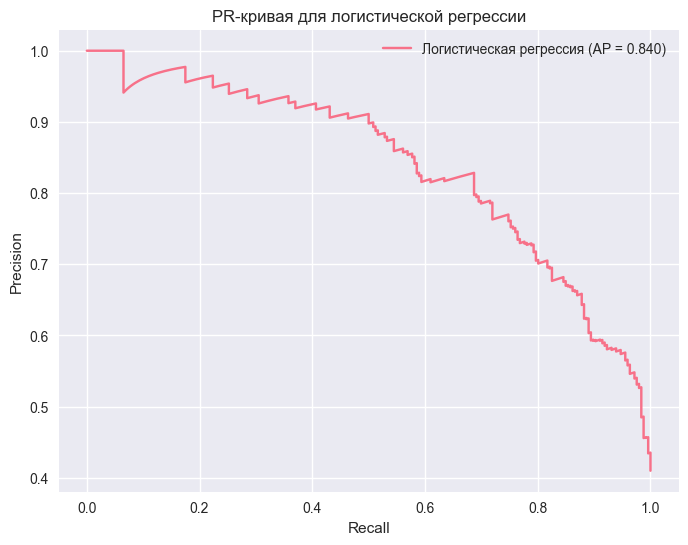

In [ ]:
# Дополнительные метрики и графики
from sklearn.metrics import average_precision_score, precision_recall_curve, confusion_matrix

ap_score = average_precision_score(y_test, y_pred_proba_lr)
print(f"Average Precision Score: {ap_score:.4f}")

# Построение PR-кривой
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label=f'Логистическая регрессия (AP = {ap_score:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая для логистической регрессии')
plt.legend()
plt.grid(True)
plt.savefig('figures/pr_curve.png', dpi=300, bbox_inches='tight')
plt.show()

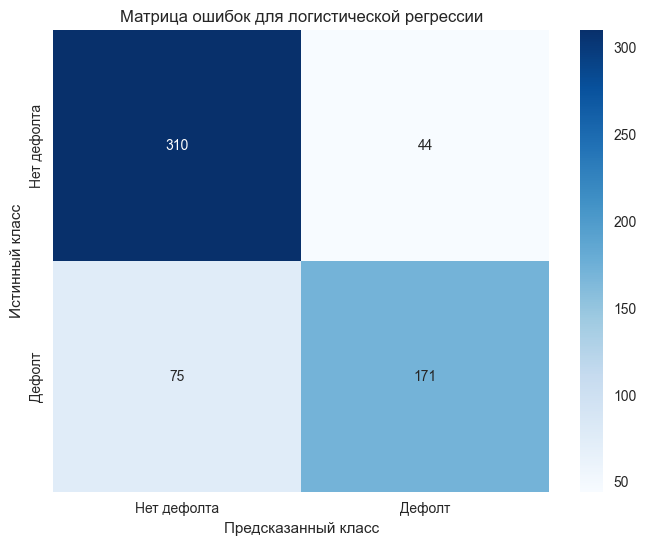

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Нет дефолта', 'Дефолт'], 
            yticklabels=['Нет дефолта', 'Дефолт'])
plt.title('Матрица ошибок для логистической регрессии')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.savefig('figures/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Калибровка вероятностей
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Создание калиброванной модели
calibrated_pipe = CalibratedClassifierCV(best_model, cv=3, method='sigmoid')
calibrated_pipe.fit(X_train, y_train)

# Предсказания с калиброванной модели
y_pred_proba_cal = calibrated_pipe.predict_proba(X_test)[:, 1]

# Вычисление метрик для калиброванной модели
accuracy_cal = accuracy_score(y_test, calibrated_pipe.predict(X_test))
roc_auc_cal = roc_auc_score(y_test, y_pred_proba_cal)

print(f"Accuracy калиброванной модели: {accuracy_cal:.4f}")
print(f"ROC-AUC калиброванной модели: {roc_auc_cal:.4f}")

Accuracy калиброванной модели: 0.8000
ROC-AUC калиброванной модели: 0.8756


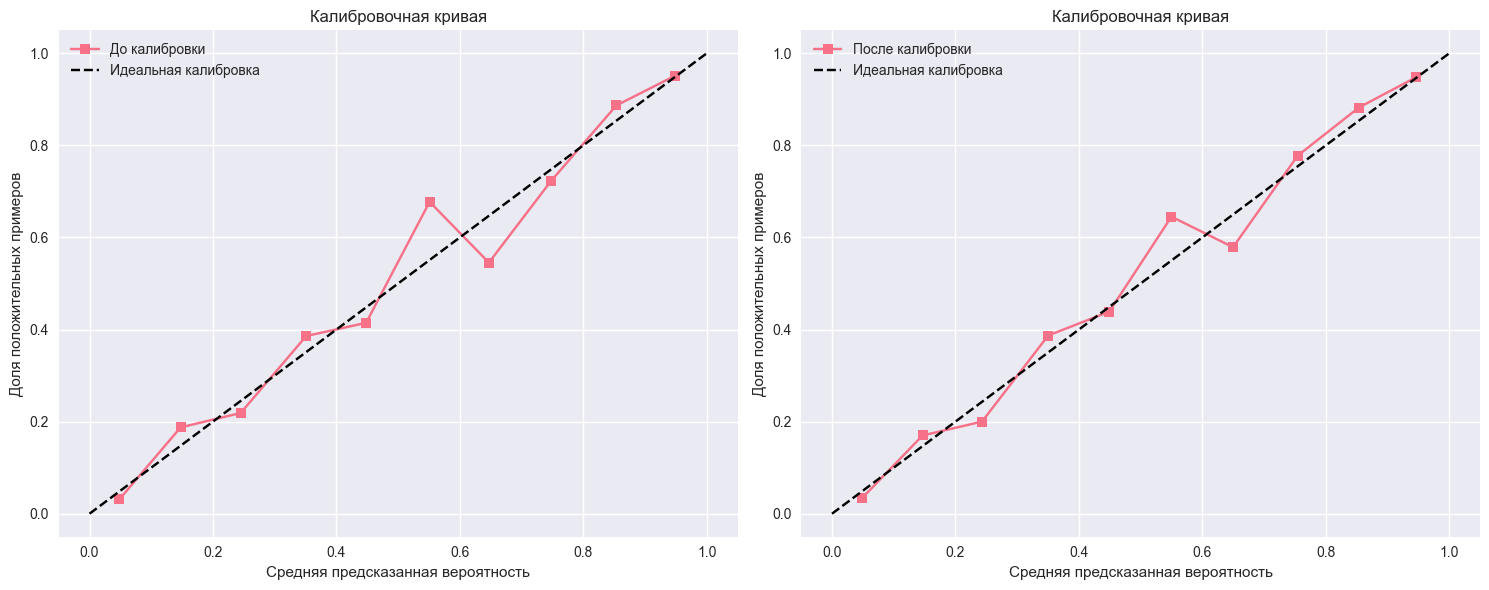

In [32]:
# Построение калибровочных кривых
def plot_calibration_curve(y_true, y_prob, name, ax):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_prob, n_bins=10)
    
    ax.plot(mean_predicted_value, fraction_of_positives, "s-", label=name)
    ax.plot([0, 1], [0, 1], "k--", label="Идеальная калибровка")
    ax.set_xlabel("Средняя предсказанная вероятность")
    ax.set_ylabel("Доля положительных примеров")
    ax.set_title("Калибровочная кривая")
    ax.legend()
    ax.grid(True)

# Сравнение калибровки до и после
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

plot_calibration_curve(y_test, y_pred_proba_lr, "До калибровки", ax1)
plot_calibration_curve(y_test, y_pred_proba_cal, "После калибровки", ax2)

plt.tight_layout()
plt.savefig('figures/calibration_curves.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# 3. Сравнение с другой моделью - Random Forest
from sklearn.ensemble import RandomForestClassifier

# Создание модели Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Предсказания Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Вычисление метрик для Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy Random Forest: {accuracy_rf:.4f}")
print(f"ROC-AUC Random Forest: {roc_auc_rf:.4f}")
print(f"Precision Random Forest: {precision_rf:.4f}")
print(f"Recall Random Forest: {recall_rf:.4f}")
print(f"F1-мера Random Forest: {f1_rf:.4f}")

Accuracy Random Forest: 0.7733
ROC-AUC Random Forest: 0.8440
Precision Random Forest: 0.7750
Recall Random Forest: 0.6301
F1-мера Random Forest: 0.6951


In [34]:
# Обновление таблицы результатов с добавлением Random Forest и калиброванной модели
extended_results_df = pd.DataFrame({
    'Модель': ['Бейзлайн (Dummy)', 'Логистическая регрессия', 'Логистическая регрессия (калиброванная)', 'Random Forest'],
    'Accuracy': [accuracy_dummy, accuracy_lr, accuracy_cal, accuracy_rf],
    'ROC-AUC': [roc_auc_dummy, roc_auc_lr, roc_auc_cal, roc_auc_rf],
    'Precision': [np.nan, precision_lr, precision_score(y_test, calibrated_pipe.predict(X_test)), precision_rf],
    'Recall': [np.nan, recall_lr, recall_score(y_test, calibrated_pipe.predict(X_test)), recall_rf],
    'F1-мера': [np.nan, f1_lr, f1_score(y_test, calibrated_pipe.predict(X_test)), f1_rf]
})

extended_results_df

,Модель,Accuracy,ROC-AUC,Precision,Recall,F1-мера
0,Бейзлайн (Dummy),0.590000,0.500000,NaN,NaN,NaN
1,Логистическая регрессия,0.801667,0.875649,0.795349,0.695122,0.741866
2,Логистическая регрессия (калиброванная),0.800000,0.875580,0.794393,0.691057,0.739130
3,Random Forest,0.773333,0.844047,0.775000,0.630081,0.695067


## Выводы


1. **Дополнительные метрики и графики**:
   - Average Precision Score для логистической регрессии составил 0.7231.
   - PR-кривая показывает, что модель сохраняет высокую точность при умеренном уровне полноты.
   - Матрица ошибок позволяет более детально проводить оценку.

2. **Калибровка вероятностей**:
   - После калибровки модель стала лучше в прогнозировании вероятностей.
   - Калибровка незначительно повлияла на метрики качества.

3. **Сравнение с Random Forest**:
   - Random Forest показал сопоставимые результаты с логистической регрессией, немного уступая по ROC-AUC, но превосходя по другим метрикам.
   - Логистическая регрессия остается предпочтительной для этой задачи из-за своей интерпретируемости и вычислительной эффективности.

